# DEM of Jammu division
- author: [Hamid](https://twitter.com/hamidrixvi)
- email: windcirculation@gmail.com

## Download Data
First, we are going to download the SRTM30 data, which is available at https://portal.opentopography.org/raster?opentopoID=OTSRTM.082015.4326.1
1. Click on the above url, and, 
2. Select a region or manually input the coordinates
3. You need to mention your email for notification

In [1]:
import rioxarray as rio

In [2]:
xds = rio.open_rasterio("/Users/syed44/Downloads/output_SRTMGL1.tif")

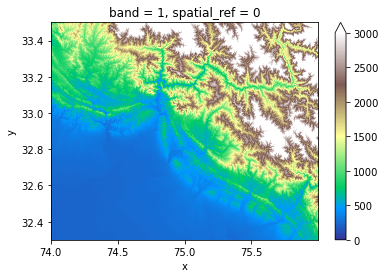

In [3]:
xds[0].plot.imshow(vmin=0, vmax = 3000, cmap = 'terrain')

In [4]:
import geopandas as gpd

In [5]:
gdf = gpd.read_file("../IMD_DWR_NETWORK/IMD_RADAR_NETWORK_2023/India-Shapefiles/District Boundary/")

In [6]:
jk = gdf[gdf['STATE'] == 'JAMMU AND KASHMIR'].reset_index(drop=True)

Jammu, Doda, Kathua, Ramban, Reasi, Kishtwar, Poonch, Rajouri, Udhampur and Samba (Source: Wikipedia)

In [7]:
jd = ['PUNCH', 'KATHUA', 'UDHAMPUR', 'RAJAURI', 'RAMBAN', 'RIASI', 'KISHTWAR', 'DODA', 'SAMBA', 'JAMMU']

In [8]:
jmu_div = jk.loc[jk['District'].isin(jd)]

In [9]:
jmu_div.reset_index(drop=True, inplace=True)

In [10]:
jmu_div

,District,STATE,geometry
0,PUNCH,JAMMU AND KASHMIR,"POLYGON ((73.50217 34.14436, 73.50838 34.14352..."
1,KATHUA,JAMMU AND KASHMIR,"POLYGON ((75.77166 32.88977, 75.77257 32.88925..."
2,UDHAMPUR,JAMMU AND KASHMIR,"POLYGON ((75.09803 33.18676, 75.10354 33.18303..."
3,RAJAURI,JAMMU AND KASHMIR,"POLYGON ((74.36872 33.58137, 74.37005 33.58130..."
4,RAMBAN,JAMMU AND KASHMIR,"POLYGON ((75.16639 33.52485, 75.16752 33.52436..."
5,RIASI,JAMMU AND KASHMIR,"POLYGON ((74.70968 33.52554, 74.71074 33.52477..."
6,KISHTWAR,JAMMU AND KASHMIR,"POLYGON ((75.65149 34.21061, 75.65490 34.20796..."
7,DODA,JAMMU AND KASHMIR,"POLYGON ((75.49443 33.40169, 75.49542 33.40038..."
8,SAMBA,JAMMU AND KASHMIR,"POLYGON ((75.05587 32.74207, 75.05659 32.74172..."
9,JAMMU,JAMMU AND KASHMIR,"POLYGON ((74.45898 32.78758, 74.45898 32.78759..."


In [15]:
import rasterio
import rasterio.features

# Extract the geometry from the GeoDataFrame
geometry = jmu_div['geometry']

# Convert the geometry to a mask
mask = rasterio.features.geometry_mask(geometry, out_shape=xds.shape[-2:],
                                       transform=xds.rio.transform(), 
                                       invert=True)

# Apply the mask to the xds dataset
masked_xds = xds.where(mask)

In [16]:
import matplotlib.pyplot as plt

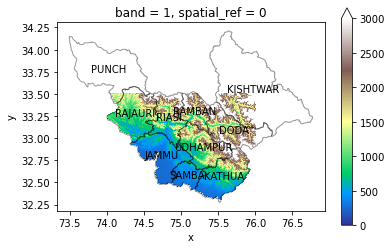

In [17]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

# Plot the masked_xds dataset
masked_xds[0].plot.imshow(vmin=0, vmax=3000, cmap='terrain', ax=ax)

# Plot the geometries of jmu_div
jmu_div.plot(ec="k", fc='none', alpha=0.4, marker='--', ax=ax)

# Add district names as text labels
for idx, row in jmu_div.iterrows():
    centroid = row['geometry'].centroid
    ax.text(centroid.x, centroid.y, row['District'], ha='center', va='center')

plt.show()

In [18]:
# Export the masked_xds dataset to GeoTIFF, or netCDF
output_file = "Jammu_division_DEM"
masked_xds.rio.to_raster(f'{output_file}.tif')
masked_xds.to_netcdf(f'{output_file}.nc')

In [23]:
!ls *Jam*

DEM_Jammu_Division.ipynb Jammu_division_DEM.nc    Jammu_division_DEM.tif


## References
Dataset Citation: NASA Shuttle Radar Topography Mission (SRTM)(2013). Shuttle Radar Topography Mission (SRTM) Global. Distributed by OpenTopography. https://doi.org/10.5069/G9445JDF. Accessed: 2023-05-15
